<a href="https://colab.research.google.com/github/ptnv-s/AdScrapper/blob/v1/Ad_Scrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 80 not upgraded.


In [118]:
import requests
from bs4 import BeautifulSoup
import cv2
from selenium import webdriver
import urllib
import PIL
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import pytesseract

In [119]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
browser = webdriver.Chrome('chromedriver',options=options)

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

**Displaying Ads**

In [122]:
browser.get("https://gadgets.ndtv.com/games/news/netflix-night-school-studio-acquisition-mobile-games-launch-spain-italy-oxenfree-2557424")

In [123]:
browser.switch_to.frame("google_ads_iframe_/1068322/NDTV_Gadgets_ROS_300x250_ATF_0")
x=browser.page_source

In [124]:
soup1=BeautifulSoup(x,'html.parser')
image=soup1.find_all('img')
print(image)
print('')
print('Ad link:',image[0]['src'])

[<img alt="" border="0" height="250" src="https://amgs5.com/AS/www/images/1474ef54f843cde59d9249d0cea7a9c5.jpg" title="" width="300"/>, <img alt="" height="0" src="https://amgs5.com/AS/www/delivery/lg.php?bannerid=1108&amp;campaignid=854&amp;zoneid=431&amp;loc=https%3A%2F%2Fgadgets.ndtv.com%2Fgames%2Fnews%2Fnetflix-night-school-studio-acquisition-mobile-games-launch-spain-italy-oxenfree-2557424&amp;cb=efa54d7685" style="width: 0px; height: 0px;" width="0"/>, <img alt="" border="0" height="1" src="https://pixel.adsafeprotected.com/rfw/st/684197/56725812/skeleton.gif?gdpr=${GDPR}&amp;gdpr_consent=${GDPR_CONSENT_278}&amp;gdpr_pd=${GDPR_PD}" width="1"/>, <img src="https://tracker.samplicio.us/tracker/07dce3a2-8004-4138-9148-f440d9c711d8/pixel.gif?sid=6331069&amp;pid=312006180&amp;crid=156934016&amp;device_id=ENTER_MOBILE_AD_ID_MACRO&amp;gdpr=${GDPR}&amp;gdpr_consent=${GDPR_CONSENT_508}&amp;gdpr_pd=${GDPR_PD}&amp;cachebuster=efa54d7685"/>]

Ad link: https://amgs5.com/AS/www/images/1474ef54f

In [125]:
imglink=image[0]['src']

In [126]:
def process_image(iamge_name, lang_code):
	return pytesseract.image_to_string(Image.open(iamge_name), lang=lang_code)

def print_data(data):
	print(data)

def output_file(filename, data):
	file = open(filename, "w+")
	file.write(data)
	file.close()

***Extracting Image of Extracted Ads***

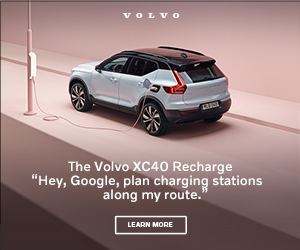

In [137]:
urllib.request.urlretrieve(imglink, 'sample.png')
img = PIL.Image.open("sample.png")
img

Tried Word Extraction using Tesseract didnt work


In [128]:
data_eng = process_image("sample.png", "eng")
print_data(data_eng)
output_file("eng.txt", data_eng)

Creators ih
Eas

 



***Using easyocr for text extraction***

In [129]:
!pip install easyocr

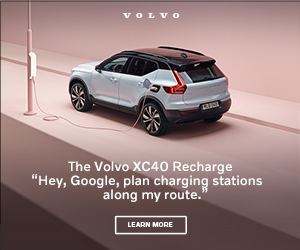

In [130]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("sample.png")
im

In [131]:
import easyocr
reader = easyocr.Reader(['en'])

In [132]:
bounds = reader.readtext('sample.png')
bounds

[([[67, 159], [235, 159], [235, 177], [67, 177]],
  'The Volvo XC40 Recharge',
  0.6462773460185208),
 ([[69, 175], [153, 175], [153, 191], [69, 191]],
  'Google, plan',
  0.8472101293780017),
 ([[211, 175], [265, 175], [265, 189], [211, 189]],
  'stations',
  0.9777153596972641),
 ([[100, 187], [201, 187], [201, 205], [100, 205]],
  'along my route',
  0.9501984332379985),
 ([[126, 220], [174, 220], [174, 228], [126, 228]],
  'LecrnMore',
  0.2177232916345535),
 ([[29.068507134334755, 170.23016355523603],
   [70.94304067756626, 175.526087639618],
   [67.93149286566525, 192.76983644476397],
   [26.05695932243374, 186.473912360382]],
  '"Hev,',
  0.28534150127270586),
 ([[153.2025477771711, 169.16585988749353],
   [212.97712919791405, 177.6984040206572],
   [209.7974522228289, 195.83414011250647],
   [150.02287080208595, 187.3015959793428]],
  'charging',
  0.9998056109084021)]

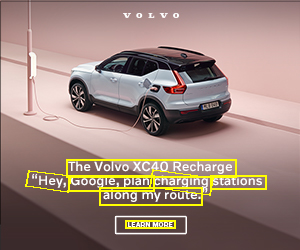

In [133]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

### ***Training Custom yolov5s model for logo detection on the flickr_logos_27_dataset***

In [75]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
#from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
from os import walk, getcwd
from PIL import Image
from shutil import copyfile

random.seed(0)
# from utils.google_utils import gdrive_download  # for downloading models/datasets

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [27]:
from PIL import Image

In [28]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
from IPython.display import Image

In [29]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [30]:
%cd yolov5
%pip install setuptools --upgrade
%pip install -r requirements.txt

/content/yolov5


In [31]:
%%bash
wget http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz
tar zxvf flickr_logos_27_dataset.tar.gz
cd flickr_logos_27_dataset
tar zxvf flickr_logos_27_dataset_images.tar.gz

flickr_logos_27_dataset/
flickr_logos_27_dataset/flickr_logos_27_dataset_distractor_set_urls.txt
flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt
flickr_logos_27_dataset/flickr_logos_27_dataset_query_set_annotation.txt
flickr_logos_27_dataset/flickr_logos_27_dataset_images.tar.gz
flickr_logos_27_dataset_images/
flickr_logos_27_dataset_images/2176584286.jpg
flickr_logos_27_dataset_images/3156402215.jpg
flickr_logos_27_dataset_images/3455836079.jpg
flickr_logos_27_dataset_images/4426526983.jpg
flickr_logos_27_dataset_images/2418409523.jpg
flickr_logos_27_dataset_images/2126991906.jpg
flickr_logos_27_dataset_images/13455389.jpg
flickr_logos_27_dataset_images/3209750863.jpg
flickr_logos_27_dataset_images/3334869821.jpg
flickr_logos_27_dataset_images/455131100.jpg
flickr_logos_27_dataset_images/3381786063.jpg
flickr_logos_27_dataset_images/3193687005.jpg
flickr_logos_27_dataset_images/2422219264.jpg
flickr_logos_27_dataset_images/339019736.jpg
flickr_logos_27_data

--2021-09-30 20:13:20--  http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz
Resolving image.ntua.gr (image.ntua.gr)... 147.102.11.1
Connecting to image.ntua.gr (image.ntua.gr)|147.102.11.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101827904 (97M) [application/x-gzip]
Saving to: ‘flickr_logos_27_dataset.tar.gz.1’

     0K .......... .......... .......... .......... ..........  0% 77.7K 21m19s
    50K .......... .......... .......... .......... ..........  0%  310K 13m20s
   100K .......... .......... .......... .......... ..........  0%  309K 10m40s
   150K .......... .......... .......... .......... ..........  0%  312K 9m19s
   200K .......... .......... .......... .......... ..........  0% 49.3M 7m28s
   250K .......... .......... .......... .......... ..........  0%  132M 6m13s
   300K .......... .......... .......... .......... ..........  0%  310K 6m5s
   350K .......... .......... .......... .......... ..........  0%  125M

In [32]:
import PIL.Image

In [33]:
import os

path = "/content/yolov5/data/Train"
os.mkdir(path)

FileExistsError: ignored

In [34]:
f = open('/content/yolov5/flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt')
lines = f.read().split('\n')[:-1]
f.close()
input_path = '/content/yolov5/flickr_logos_27_dataset/flickr_logos_27_dataset_images'
for line in lines:
  print_buffer = []
  print(line)
  chunks = line.split(' ')
  name = chunks[0]
  class_id = 0
  xmin = float(chunks[3])
  xmax = float(chunks[5])
  ymin = float(chunks[4])
  ymax = float(chunks[6])
  img_path = '/content/yolov5/flickr_logos_27_dataset/flickr_logos_27_dataset_images/'+ str(name) 
  img=PIL.Image.open(img_path)
  w= int(img.size[0])
  h= int(img.size[1])
  b_center_x = (xmin + xmax) / 2 
  b_center_y = (ymin + ymax) / 2
  b_width    = (xmax - xmin)
  b_height   = (ymax - ymin)
  b_center_x /= w 
  b_center_y /= h 
  b_width    /= w 
  b_height   /= h
  print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
  save_file_name = os.path.join("/content/yolov5/data/Train", name.replace("jpg", "txt"))
  print("\n".join(print_buffer), file= open(save_file_name, "w"))


144503924.jpg Adidas 1 38 12 234 142 
2451569770.jpg Adidas 1 242 208 413 331 
390321909.jpg Adidas 1 13 5 89 60 
4761260517.jpg Adidas 1 43 122 358 354 
4763210295.jpg Adidas 1 83 63 130 93 
4763210295.jpg Adidas 1 91 288 125 306 
4763210295.jpg Adidas 1 182 63 229 94 
4763210295.jpg Adidas 1 192 291 225 306 
4763210295.jpg Adidas 1 285 61 317 79 
4763210295.jpg Adidas 1 285 298 324 329 
4763210295.jpg Adidas 1 377 292 421 324 
4763210295.jpg Adidas 1 383 55 416 76 
1230939811.jpg Adidas 2 129 326 257 423 
1230939811.jpg Adidas 2 137 336 243 395 
2550056374.jpg Adidas 2 18 2 488 278 
3294282629.jpg Adidas 2 126 252 207 311 
3294282629.jpg Adidas 2 127 324 206 381 
3294282629.jpg Adidas 2 129 109 206 162 
3294282629.jpg Adidas 2 132 176 206 234 
3294282629.jpg Adidas 2 212 111 287 165 
3294282629.jpg Adidas 2 213 180 288 236 
3294282629.jpg Adidas 2 213 253 290 312 
3294282629.jpg Adidas 2 213 327 287 382 
3294282629.jpg Adidas 2 294 109 373 167 
3294282629.jpg Adidas 2 294 327 372 383

In [35]:
annotations = [os.path.join('/content/yolov5/data/Train', x) for x in os.listdir('/content/yolov5/data/Train') if x[-3:] == "txt"]

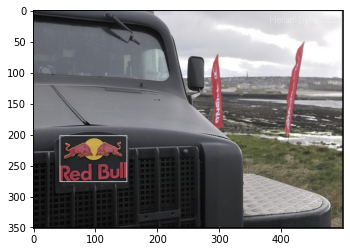

In [36]:
random.seed(6)



def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)
    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
file = open(annotation_file)
annotation_list = file.read().split("\n")[:-1]
annotation_list = [x.split(" ") for x in annotation_list]
annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("data/Train", "flickr_logos_27_dataset/flickr_logos_27_dataset_images").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = PIL.Image.open(image_file)
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [37]:
from PIL import Image

In [38]:
path = "/content/yolov5/data/Train_Image"
os.mkdir(path)

In [39]:
for i in annotations:
  image_file = i.replace("data/Train", "flickr_logos_27_dataset/flickr_logos_27_dataset_images").replace("txt", "jpg")
  assert os.path.exists(image_file)
  image = Image.open(image_file)
  im2 = image.copy()
  counter = i.replace("data/Train", "data/Train_Image").replace("txt", "jpg")
  im2.save(counter)

In [40]:
annotations = [os.path.join('/content/yolov5/data/Train', x) for x in os.listdir('/content/yolov5/data/Train') if x[-3:] == "txt"]
annotations.sort()
images_tv = [os.path.join('/content/yolov5/data/Train_Image', x) for x in os.listdir('/content/yolov5/data/Train_Image') if x[-3:] == "jpg"]
images_tv.sort()

In [41]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_annotations, val_annotations = train_test_split(images_tv, annotations, test_size = 0.2, random_state = 1)

In [42]:
path = "/content/yolov5/data/images/train/"
os.mkdir(path)
path = "/content/yolov5/data/images/val/"
os.mkdir(path)


In [43]:
from PIL import Image
path = "/content/yolov5/data/labels/"
os.mkdir(path)
path = "/content/yolov5/data/labels/train/"
os.mkdir(path)
path = "/content/yolov5/data/labels/val/"
os.mkdir(path)

In [44]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, '/content/yolov5/data/images/train/')
move_files_to_folder(val_images, '/content/yolov5/data/images/val/')
move_files_to_folder(train_annotations, '/content/yolov5/data/labels/train/')
move_files_to_folder(val_annotations, '/content/yolov5/data/labels/val/')

In [45]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 1.1 MB/s 
     |████████████████████████████████| 180 kB 46.3 MB/s 
     |████████████████████████████████| 97 kB 6.0 MB/s 
     |████████████████████████████████| 139 kB 47.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=75fc726955a32601c7b6ab655b9786dd9060d8fed369099d871430e162ead6b5
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=d0a90ba7d9cad1b39e506b6154908d39e1bd498b555de59c77b4e422a5840a84
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


**Download yaml config file from link and put it in yolov5->data folder** [from here](https://drive.google.com/file/d/1lajqLpKbFYHjAer9Y6XmE8Y09RB4q6wu/view?usp=sharing)

In [46]:
!python detect.py --weights yolov5s6.pt --img 1280 

detect: weights=['yolov5s6.pt'], source=data/images, imgsz=[1280, 1280], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-486-gba99092 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

100% 24.6M/24.6M [00:00<00:00, 39.5MB/s]

Fusing layers... 
Model Summary: 291 layers, 12653596 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 1280x960 3 persons, 1 bus, Done. (0.080s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 768x1280 2 persons, 1 tie, Done. (0.068s)
Speed: 1.3ms pre-process, 73.7ms inference, 10.1ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to runs/detect/exp


In [47]:
!python train.py --img 640 --cfg yolov5s6.yaml --hyp hyp.scratch.yaml --batch 32 --epochs 30 --data logo.yaml --weights yolov5s6.pt --workers 24 --name yolo_road_det

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 2
wandb: You chose 'Use an existing W&B account'
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
train: weights=yolov5s6.pt, cfg=yolov5s6.yaml, data=logo.yaml, hyp=hyp.scratch.yaml, epochs=30, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=24, entity=None, project=runs/train, name=yolo_road_det, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100
github: up to 

In [50]:
!python detect.py --source data/images/val/ --weights runs/train/yolo_road_det/weights/best.pt --name number_plate --line-thickness 2



detect: weights=['runs/train/yolo_road_det/weights/best.pt'], source=data/images/val/, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=number_plate, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-486-gba99092 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 291 layers, 12349288 parameters, 0 gradients, 16.7 GFLOPs
image 1/162 /content/yolov5/data/images/val/109950015.jpg: 448x640 1 logo, Done. (0.033s)
image 2/162 /content/yolov5/data/images/val/117933049.jpg: 512x640 1 logo, Done. (0.034s)
image 3/162 /content/yolov5/data/images/val/128500912.jpg: 512x640 1 logo, Done. (0.031s)
image 4/162 /content/yolov5/data/images/val/1352999361.jpg: 512x640 2 logos, Done. (0.031s)
image 5/162 /content/yolov

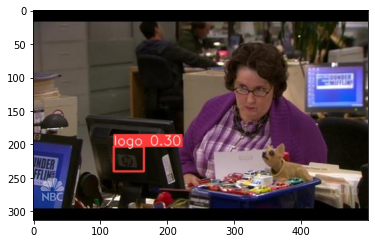

In [51]:
detections_dir = "/content/yolov5/runs/detect/number_plate3/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [52]:
path = "/content/yolov5/data/images/test/"
os.mkdir(path)

In [134]:

!cp sample.png /content/yolov5/data/images/test

In [135]:
!python detect.py --source data/images/test/ --weights runs/train/yolo_road_det/weights/best.pt --name number_plate --line-thickness 2 --save-txt


detect: weights=['runs/train/yolo_road_det/weights/best.pt'], source=data/images/test/, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=number_plate, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-486-gba99092 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 291 layers, 12349288 parameters, 0 gradients, 16.7 GFLOPs
image 1/1 /content/yolov5/data/images/test/sample.png: 576x640 Done. (0.036s)
Speed: 0.5ms pre-process, 36.0ms inference, 0.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/number_plate7
0 labels saved to runs/detect/number_plate7/labels


### ***Could use the extracted labels to cut the logo using opencv if get access to a more generalised dataset to train model***

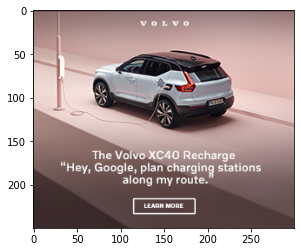

In [136]:
detections_dir = "/content/yolov5/runs/detect/number_plate7/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [138]:
!pip install pipreqs
!pip install nbconvert

In [139]:
%%bash
jupyter nbconvert --output-dir="./reqs" --to script my\ Adease.ipynb
cd reqs
pipreqs


This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run nbconvert in place, overwriting the existing notebook (only 
    relevan

[NbConvertApp] WARNING | pattern u'my Adease.ipynb' matched no files
INFO: Successfully saved requirements file in /content/yolov5/reqs/requirements.txt


In [142]:
%%bash
pip freeze > requirements.txt

In [143]:
!pip3 freeze > ads_requirements.txt